In [4]:
import pandas as pd
import numpy as np

In [1]:
#!wget -O data.csv https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-20 20:51:45--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  78.98K  --.-KB/s    in 0.007s  

2025-10-20 20:51:45 (10.9 MB/s) - ‘data.csv’ saved [80876/80876]



In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [8]:
categorical = ['lead_source','industry','employment_status','location']
numerical = ['number_of_courses_viewed', 'annual_income','interaction_count', 'lead_score']

In [9]:
df['lead_source'] = df.lead_source.fillna('NA')
df['industry'] = df.industry.fillna('NA')
df['employment_status'] = df['employment_status'].fillna('NA')
df['location'] = df['location'].fillna('NA')
df['annual_income'] = df.annual_income.fillna(0.0)

In [86]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [87]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [88]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [89]:
y_val.shape

(293,)

In [90]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

In [115]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [116]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

In [117]:
y_pred = model.predict_proba(X_val)[:, 1]
convert_decision = (y_pred >= 0.5)
(y_val == convert_decision).mean()

np.float64(0.7510729613733905)

In [118]:
from sklearn.metrics import roc_auc_score

In [119]:
roc_auc_score(y_val, y_pred)

0.8558272713202291

## Question 1: ROC AUC feature importance
Which numerical variable (among the following 4) has the highest AUC?<br>
lead_score / number_of_courses_viewed / interaction_count / annual_income

In [120]:
bin_array = (df_train['annual_income'].to_numpy()/(2*df_train['annual_income'].mean())>0.5).astype(int)
bin_array

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [121]:
r_auc_scores = []
for num in numerical:
    #y_pred = (df_train[num].to_numpy()/(2*df_train[num].mean())>0.5).astype(int)
    r_auc = roc_auc_score(y_train,df_train[num])
    r_auc_scores.append((num,r_auc))

In [122]:
r_auc_scores

[('number_of_courses_viewed', 0.7475757094986033),
 ('annual_income', 0.5499425478007106),
 ('interaction_count', 0.7183327804460599),
 ('lead_score', 0.6173635450170433)]

#### ANSWER 1: number_of_courses_viewed

## Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:<br>
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)<br>
What's the AUC of this model on the validation dataset? (round to 3 digits)<br>
0.32 / 0.52 / 0.72 / 0.92


###### ANSWER 2: 0.86 from about 6 cells up.

## Question 3: Precision and Recall
Now let's compute precision and recall for our model.<br>
Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01<br>
For each threshold, compute precision and recall<br>
Plot them<br>
At which threshold precision and recall curves intersect<br>
0.145 / 0.345 / 0.545 / 0.745

In [99]:
y_pred = model.predict_proba(X_val)[:, 1]

In [100]:
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()

In [101]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(np.float64(0.6693877551020408), np.float64(0.9590643274853801))

In [102]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

    return df_scores

In [103]:
df_scores = tpr_fpr_dataframe(y_val, y_pred)

In [104]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

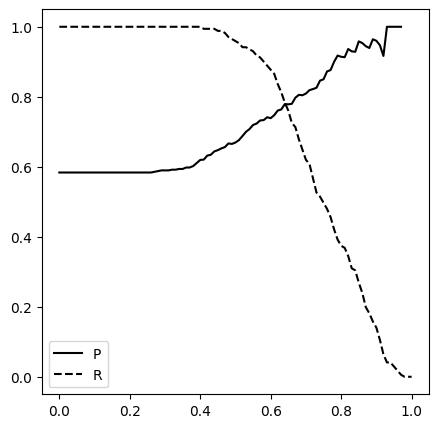

In [123]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.threshold, df_scores.p, color='black', linestyle='solid', label='P')
plt.plot(df_scores.threshold, df_scores.r, color='black', linestyle='dashed', label='R')
plt.legend()
plt.show()

In [126]:
df_scores.iloc[64].p - df_scores.iloc[64].r

np.float64(-0.0045559635522914865)

#### ANSWER 3: Precision and recall intersect at t = 0.64.

## Question 4: F1 score
F1 = 2(P*R)/(P+R)

At which threshold F1 is maximal?
0.14 / 0.34 / 0.54 / 0.74

57    0.57
Name: threshold, dtype: float64

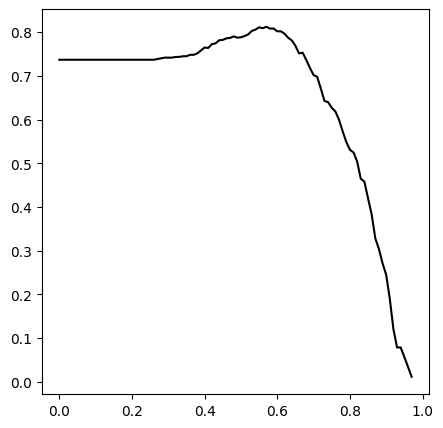

In [107]:
df_scores['F1'] = 2* (df_scores.p * df_scores.r)/(df_scores.p + df_scores.r)

plt.figure(figsize=(5, 5))
plt.plot(df_scores.threshold, df_scores.F1, color='black', linestyle='solid', label='F1')
df_scores.threshold[df_scores.F1.max()==df_scores.F1]

#### ANSWER 4: F1 is max at t = 0.57.

## Question 5: 5-Fold CV
How large is standard deviation of the scores across different folds?<br>
0.0001 / 0.006 / 0.06 / 0.36

In [108]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [109]:
from sklearn.model_selection import KFold

In [110]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [111]:
aucs = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    y_train = df_train.converted.values

    df_val = df_full_train.iloc[val_idx]
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [112]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.822 ± 0.041


#### ANSWER 5: The standard deviation is 0.041.

## Question 6: Hyperparameter Tuning
Which C leads to the best mean score?<br>
0.000001 / 0.001 / 1

In [113]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)

    return dv, model

In [114]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.000001, 0.001, 1]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        y_train = df_train.converted.values
    
        df_val = df_full_train.iloc[val_idx]
        y_val = df_val.converted.values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        rocauc = roc_auc_score(y_val, y_pred)
        aucs.append(rocauc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=1e-06, auc = 0.560 ± 0.024
C=0.001, auc = 0.867 ± 0.029
C=1, auc = 0.822 ± 0.036


#### ANSWER 6: C=0.001 leads to the best mean auc score.